# Random Forest Modeling

## Predicting the character 

In [1]:
#import necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Importing the Random Forest Classifier module 
from sklearn.ensemble import RandomForestClassifier

#Importing CountVectorizer and TFIDFVectorizer from feature_extraction.text
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.feature_extraction import text

#Other modules needed 
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import (plot_confusion_matrix, accuracy_score, 
                             classification_report, f1_score)

from nltk.corpus import stopwords


In [2]:
#import the dataset
friends = pd.read_csv('../../Datasets/friends-modeling.csv')
friends.head()

,season,episode,character,dialogue
0,s01,e01,Monica Geller,There's nothing to tell! He's just some guy I ...
1,s01,e01,Joey Tribbiani,"C'mon, you're going out with the guy! There's ..."
2,s01,e01,Chandler Bing,"All right Joey, be nice. So does he have a hum..."
3,s01,e01,Phoebe Buffay,"Wait, does he eat chalk?"
4,s01,e01,Phoebe Buffay,"Just, 'cause, I don't want her to go through w..."


In [3]:
#Make sure no nulls
friends.isnull().sum()

season       0
episode      0
character    0
dialogue     0
dtype: int64

### Make X and y values 

In [4]:
X = friends['dialogue']
y = friends['character']

### Split into Train and Test

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [6]:
X_train.shape

(33604,)

In [7]:
y_train.shape

(33604,)

In [8]:
X_test.shape

(11202,)

In [9]:
y_test.shape

(11202,)

### Baseline Accuracy 

In [10]:
y_train.value_counts(normalize=True)

Rachel Green      0.177657
Ross Geller       0.177152
Chandler Bing     0.169355
Monica Geller     0.167242
Joey Tribbiani    0.160725
Phoebe Buffay     0.147869
Name: character, dtype: float64

### Setting up a Pipe for all Random Forest Modeling with CountVectorizer

In [11]:
pipe_cv = Pipeline(steps=[('cv', CountVectorizer()),
                       ('rf', RandomForestClassifier(random_state=42))
                      ])

### Modeling: Basic Model with Default Parameters and using CountVectorizer

In [74]:
grid_default = {'cv__stop_words':[None, 'english']}

In [75]:
# Instaniate a gridSearch object 
gs_default = GridSearchCV(estimator=pipe_cv, param_grid=grid_default)
gs_default.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('cv', CountVectorizer()),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'cv__stop_words': [None, 'english']})

In [76]:
gs_default.best_params_

{'cv__stop_words': None}

In [77]:
gs_default.score(X_train, y_train), gs_default.score(X_test, y_test)

(0.9547970479704797, 0.2852169255490091)

In [78]:
gs_default.best_score_

0.2753540165508251

In [79]:
preds_grid_default = gs_default.predict(X_test)

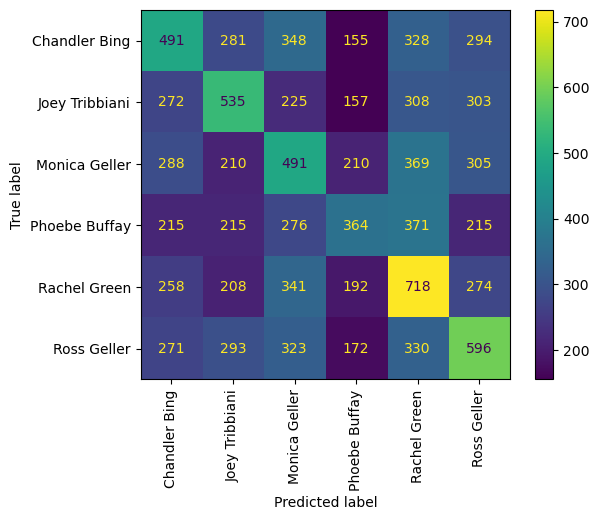

In [80]:
plot_confusion_matrix(estimator=gs_default, X = X_test, y_true=y_test)
plt.xticks(rotation = 90)
plt.show()

In [81]:
print(classification_report(y_test, preds_grid_default))

                precision    recall  f1-score   support

 Chandler Bing       0.27      0.26      0.27      1897
Joey Tribbiani       0.31      0.30      0.30      1800
 Monica Geller       0.25      0.26      0.25      1873
 Phoebe Buffay       0.29      0.22      0.25      1656
  Rachel Green       0.30      0.36      0.33      1991
   Ross Geller       0.30      0.30      0.30      1985

      accuracy                           0.29     11202
     macro avg       0.29      0.28      0.28     11202
  weighted avg       0.29      0.29      0.28     11202



In [82]:
accuracy_score(y_true=y_test, y_pred=preds_grid_default)

0.2852169255490091

In [84]:
df_default = pd.DataFrame(y_test)

df_default['predictions'] = preds_grid_default
df_default['dialogue'] = X_test
df_default.rename(columns={'character': 'actual'}, inplace=True)
df_default.head(10)

,actual,predictions,dialogue
8260,Monica Geller,Joey Tribbiani,Then what's the problem?
12970,Phoebe Buffay,Phoebe Buffay,"Yeah, well, everybody does! I'm a really cool ..."
9682,Rachel Green,Phoebe Buffay,What? What? He's interested in you. He-he like...
22017,Monica Geller,Chandler Bing,I've never loved anybody as much as I love you.
5611,Rachel Green,Chandler Bing,And I'm in it? Then let me read it.
22331,Joey Tribbiani,Joey Tribbiani,"Yeah, I gotta go! I got an acting job. Like yo..."
18609,Monica Geller,Phoebe Buffay,Great. So the ball is in his court?
23737,Monica Geller,Monica Geller,"Dad, please don't pick your teeth out here! Al..."
35446,Ross Geller,Chandler Bing,"Excellent! Excellent, now-now do you want anot..."
3756,Monica Geller,Ross Geller,How are you?


In [85]:
df_default.loc[df_default['actual']!= df_default['predictions']].count()

actual         8007
predictions    8007
dialogue       8007
dtype: int64

In [86]:
df_default.shape

(11202, 3)

#### Predicting Some Phrases

In [42]:
preds_grid_default.predict(["How you doin'?"])

array(['Joey Tribbiani'], dtype=object)

----
### With Parameters!

In [87]:
grid_params_1 = {'cv__stop_words':[None, 'english'],
                'rf__max_depth': [10, 25, 50, 75, 100, 150],
                'rf__min_samples_split': [10, 15, 20, 25, 30]}

In [88]:
gs_1 = GridSearchCV(estimator=pipe_cv, param_grid= grid_params_1)
gs_1.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('cv', CountVectorizer()),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'cv__stop_words': [None, 'english'],
                         'rf__max_depth': [10, 25, 50, 75, 100, 150],
                         'rf__min_samples_split': [10, 15, 20, 25, 30]})

In [89]:
gs_1.best_params_

{'cv__stop_words': None, 'rf__max_depth': 150, 'rf__min_samples_split': 20}

In [90]:
gs_1.score(X_train, y_train), gs_1.score(X_test, y_test)

(0.8246042137840733, 0.30333868951972864)

In [91]:
gs_1.best_score_

0.30014300858715753

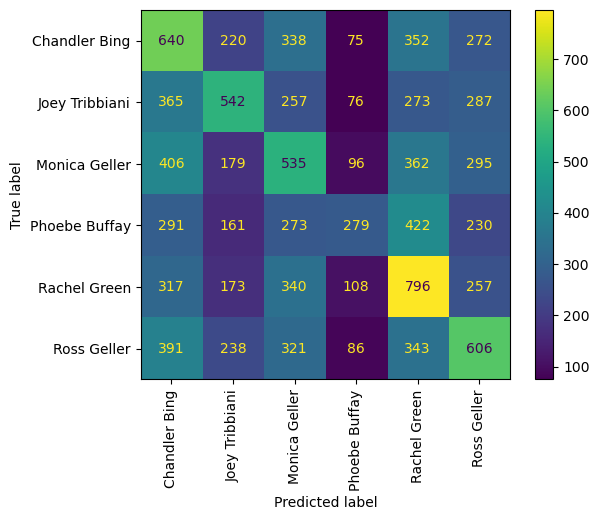

In [92]:
plot_confusion_matrix(estimator=gs_1, X=X_test, y_true=y_test)
plt.xticks(rotation=90)
plt.show()

In [93]:
preds_1 = gs_1.predict(X_test)

In [94]:
print(classification_report(y_true=y_test, y_pred=preds_1))

                precision    recall  f1-score   support

 Chandler Bing       0.27      0.34      0.30      1897
Joey Tribbiani       0.36      0.30      0.33      1800
 Monica Geller       0.26      0.29      0.27      1873
 Phoebe Buffay       0.39      0.17      0.23      1656
  Rachel Green       0.31      0.40      0.35      1991
   Ross Geller       0.31      0.31      0.31      1985

      accuracy                           0.30     11202
     macro avg       0.32      0.30      0.30     11202
  weighted avg       0.31      0.30      0.30     11202



In [95]:
accuracy_score(y_true=y_test, y_pred=preds_1)

0.30333868951972864

In [96]:
df_params_1 = pd.DataFrame(y_test)
df_params_1['predictions'] = preds_1 
df_params_1['dialogue'] = X_test
df_params_1.rename(columns={'character': 'actual'}, inplace=True)
df_params_1.head(10)

,actual,predictions,dialogue
8260,Monica Geller,Ross Geller,Then what's the problem?
12970,Phoebe Buffay,Phoebe Buffay,"Yeah, well, everybody does! I'm a really cool ..."
9682,Rachel Green,Monica Geller,What? What? He's interested in you. He-he like...
22017,Monica Geller,Monica Geller,I've never loved anybody as much as I love you.
5611,Rachel Green,Chandler Bing,And I'm in it? Then let me read it.
22331,Joey Tribbiani,Joey Tribbiani,"Yeah, I gotta go! I got an acting job. Like yo..."
18609,Monica Geller,Monica Geller,Great. So the ball is in his court?
23737,Monica Geller,Monica Geller,"Dad, please don't pick your teeth out here! Al..."
35446,Ross Geller,Chandler Bing,"Excellent! Excellent, now-now do you want anot..."
3756,Monica Geller,Monica Geller,How are you?


In [97]:
df_params_1.loc[df_params_1['actual']!= df_params_1['predictions']].count()

actual         7804
predictions    7804
dialogue       7804
dtype: int64

#### Predicting Some Phrases

In [43]:
gs_1.predict(["How you doin'?"])

NameError: name 'gs_1' is not defined

----
Trying out more parameters

In [14]:
#Trying out more parameters!
grid_params_2 = {'cv__stop_words':[None, 'english'],
                'rf__max_depth': [150, 160, 170, 180, 190, 200],
                'rf__min_samples_split': [10, 15, 20, 25, 30]
}

In [15]:
gs_2 = GridSearchCV(estimator=pipe_cv, param_grid=grid_params_2)
gs_2.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('cv', CountVectorizer()),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'cv__stop_words': [None, 'english'],
                         'rf__max_depth': [150, 160, 170, 180, 190, 200],
                         'rf__min_samples_split': [10, 15, 20, 25, 30]})

In [16]:
gs_2.best_params_

{'cv__stop_words': None, 'rf__max_depth': 180, 'rf__min_samples_split': 25}

In [17]:
gs_2.score(X_train, y_train), gs_2.score(X_test, y_test)

(0.8478454945839781, 0.30387430815925726)

In [18]:
preds_2 = gs_2.predict(X_test)

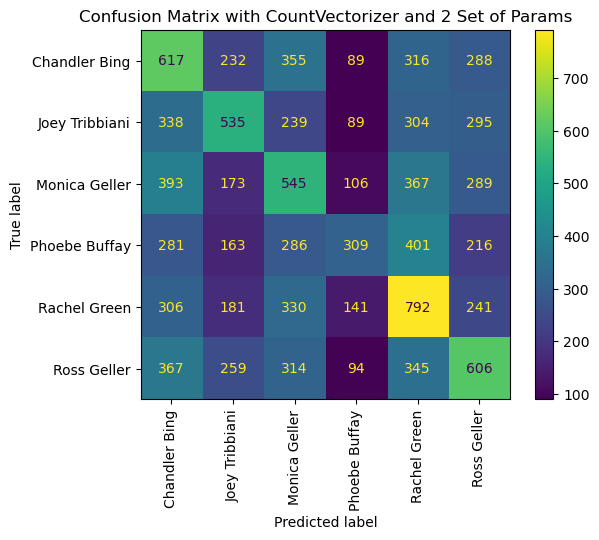

In [35]:
plot_confusion_matrix(estimator=gs_2, X=X_test, y_true=y_test)
plt.xticks(rotation=90)
plt.title('Confusion Matrix with CountVectorizer and 2 Set of Params')
plt.show()

In [36]:
print(classification_report(y_true=y_test, y_pred=preds_2))

                precision    recall  f1-score   support

 Chandler Bing       0.27      0.33      0.29      1897
Joey Tribbiani       0.35      0.30      0.32      1800
 Monica Geller       0.26      0.29      0.28      1873
 Phoebe Buffay       0.37      0.19      0.25      1656
  Rachel Green       0.31      0.40      0.35      1991
   Ross Geller       0.31      0.31      0.31      1985

      accuracy                           0.30     11202
     macro avg       0.31      0.30      0.30     11202
  weighted avg       0.31      0.30      0.30     11202



In [37]:
accuracy_score(y_test, preds_2)

0.30387430815925726

In [38]:
df_params_2 = pd.DataFrame(y_test)
df_params_2['predictions'] = preds_2
df_params_2['dialogue'] = X_test
df_params_2.rename(columns={'character': 'actual'}, inplace=True)
df_params_2.head(10)

,actual,predictions,dialogue
8260,Monica Geller,Ross Geller,Then what's the problem?
12970,Phoebe Buffay,Phoebe Buffay,"Yeah, well, everybody does! I'm a really cool ..."
9682,Rachel Green,Rachel Green,What? What? He's interested in you. He-he like...
22017,Monica Geller,Monica Geller,I've never loved anybody as much as I love you.
5611,Rachel Green,Chandler Bing,And I'm in it? Then let me read it.
22331,Joey Tribbiani,Joey Tribbiani,"Yeah, I gotta go! I got an acting job. Like yo..."
18609,Monica Geller,Chandler Bing,Great. So the ball is in his court?
23737,Monica Geller,Ross Geller,"Dad, please don't pick your teeth out here! Al..."
35446,Ross Geller,Chandler Bing,"Excellent! Excellent, now-now do you want anot..."
3756,Monica Geller,Monica Geller,How are you?


In [39]:
df_params_2[df_params_2['actual'] != df_params_2['predictions']].count()

actual         7798
predictions    7798
dialogue       7798
dtype: int64

In [40]:
df_params_2[df_params_2['actual'] == df_params_2['predictions']].count()

actual         3404
predictions    3404
dialogue       3404
dtype: int64

#### Predicting Some Phrases

In [42]:
gs_2.predict(["How you doin'?"])

array(['Joey Tribbiani'], dtype=object)

### Pipe Using TfidfVectorizer

In [19]:
pipe_tf = Pipeline(steps=[('tf', TfidfVectorizer()),
                         ('rf', RandomForestClassifier(random_state=42))])

### GridSearch with Default Parameters 

In [20]:
grid_tf_d = {'tf__stop_words': [None, 'english'],
            'tf__min_df': [0,1]}

In [21]:
gs_tf_d = GridSearchCV(estimator=pipe_tf, param_grid= grid_tf_d)
gs_tf_d.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('tf', TfidfVectorizer()),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'tf__min_df': [0, 1],
                         'tf__stop_words': [None, 'english']})

In [24]:
gs_tf_d.best_params_

{'tf__min_df': 0, 'tf__stop_words': None}

In [23]:
gs_tf_d.score(X_train, y_train), gs_tf_d.score(X_test, y_test)

(0.9532198547791929, 0.2959292983395822)

In [26]:
tf_preds = gs_tf_d.predict(X_test)

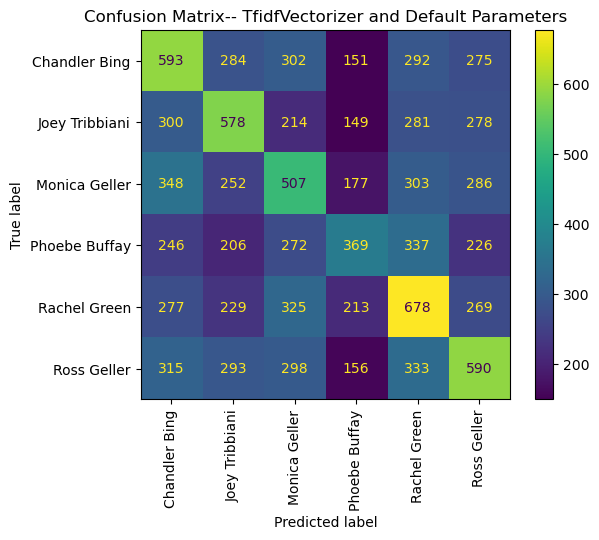

In [29]:
plot_confusion_matrix(estimator= gs_tf_d, X= X_test, y_true= y_test)
plt.xticks(rotation=90)
plt.title('Confusion Matrix-- TfidfVectorizer and Default Parameters')
plt.show()

In [30]:
df_tf_d = pd.DataFrame(y_test)
df_tf_d['predictions'] = tf_preds 
df_tf_d['dialogue'] = X_test
df_tf_d.rename(columns={'character': 'actual'}, inplace=True)
df_tf_d.head(10)

,actual,predictions,dialogue
8260,Monica Geller,Joey Tribbiani,Then what's the problem?
12970,Phoebe Buffay,Phoebe Buffay,"Yeah, well, everybody does! I'm a really cool ..."
9682,Rachel Green,Phoebe Buffay,What? What? He's interested in you. He-he like...
22017,Monica Geller,Chandler Bing,I've never loved anybody as much as I love you.
5611,Rachel Green,Chandler Bing,And I'm in it? Then let me read it.
22331,Joey Tribbiani,Joey Tribbiani,"Yeah, I gotta go! I got an acting job. Like yo..."
18609,Monica Geller,Chandler Bing,Great. So the ball is in his court?
23737,Monica Geller,Monica Geller,"Dad, please don't pick your teeth out here! Al..."
35446,Ross Geller,Chandler Bing,"Excellent! Excellent, now-now do you want anot..."
3756,Monica Geller,Ross Geller,How are you?


In [32]:
df_tf_d[df_tf_d['actual'] != df_tf_d['predictions']].count()

actual         7887
predictions    7887
dialogue       7887
dtype: int64

In [33]:
df_tf_d[df_tf_d['actual'] == df_tf_d['predictions']].count()

actual         3315
predictions    3315
dialogue       3315
dtype: int64

#### Predicting Some Phrases

In [45]:
gs_tf_d.predict(["How you doin'?"])

array(['Joey Tribbiani'], dtype=object)

----
### With Parameters! (TfidfVectorizer)

In [46]:
tf_grids_1 = {'tf__stop_words':[None, 'english'],
                'rf__max_depth': [10, 25, 50, 75, 100, 150],
                'rf__min_samples_split': [10, 15, 20, 25, 30]}

In [47]:
tf_gs_1 = GridSearchCV(estimator=pipe_tf, param_grid= tf_grids_1)
tf_gs_1.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('tf', TfidfVectorizer()),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'rf__max_depth': [10, 25, 50, 75, 100, 150],
                         'rf__min_samples_split': [10, 15, 20, 25, 30],
                         'tf__stop_words': [None, 'english']})

In [48]:
tf_gs_1.best_params_

{'rf__max_depth': 100, 'rf__min_samples_split': 25, 'tf__stop_words': None}

In [49]:
tf_gs_1.score(X_train, y_train), tf_gs_1.score(X_test, y_test)

(0.807731222473515, 0.295215140153544)

In [50]:
tf_gs_1.best_score_

0.2977030460674078

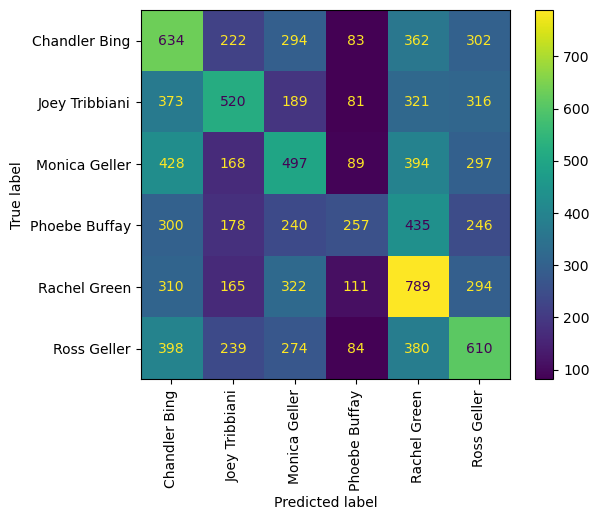

In [51]:
plot_confusion_matrix(estimator=tf_gs_1, X=X_test, y_true=y_test)
plt.xticks(rotation=90)
plt.show()

In [52]:
tf_preds_1 = tf_gs_1.predict(X_test)

In [53]:
print(classification_report(y_true=y_test, y_pred=tf_preds_1))

                precision    recall  f1-score   support

 Chandler Bing       0.26      0.33      0.29      1897
Joey Tribbiani       0.35      0.29      0.32      1800
 Monica Geller       0.27      0.27      0.27      1873
 Phoebe Buffay       0.36      0.16      0.22      1656
  Rachel Green       0.29      0.40      0.34      1991
   Ross Geller       0.30      0.31      0.30      1985

      accuracy                           0.30     11202
     macro avg       0.31      0.29      0.29     11202
  weighted avg       0.30      0.30      0.29     11202



In [54]:
accuracy_score(y_true=y_test, y_pred=tf_preds_1)

0.295215140153544

In [55]:
tf_df_1 = pd.DataFrame(y_test)
tf_df_1['predictions'] = tf_preds_1 
tf_df_1['dialogue'] = X_test
tf_df_1.rename(columns={'character': 'actual'}, inplace=True)
tf_df_1.head(10)

,actual,predictions,dialogue
8260,Monica Geller,Ross Geller,Then what's the problem?
12970,Phoebe Buffay,Rachel Green,"Yeah, well, everybody does! I'm a really cool ..."
9682,Rachel Green,Monica Geller,What? What? He's interested in you. He-he like...
22017,Monica Geller,Chandler Bing,I've never loved anybody as much as I love you.
5611,Rachel Green,Chandler Bing,And I'm in it? Then let me read it.
22331,Joey Tribbiani,Joey Tribbiani,"Yeah, I gotta go! I got an acting job. Like yo..."
18609,Monica Geller,Chandler Bing,Great. So the ball is in his court?
23737,Monica Geller,Monica Geller,"Dad, please don't pick your teeth out here! Al..."
35446,Ross Geller,Chandler Bing,"Excellent! Excellent, now-now do you want anot..."
3756,Monica Geller,Ross Geller,How are you?


In [56]:
tf_df_1.loc[tf_df_1['actual']!= tf_df_1['predictions']].count()

actual         7895
predictions    7895
dialogue       7895
dtype: int64

#### Predicting Some Phrases

In [58]:
tf_gs_1.predict(["How you doin'?"])

array(['Joey Tribbiani'], dtype=object)